In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns

In [21]:
tendulkar_df = pd.read_csv("./tendulkar_ODI.csv")

In [24]:
tendulkar_df.head(50)

,Unnamed: 0,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,1,0,-,2,0,0,0,5,caught,2,v Pakistan,Gujranwala,18-Dec-89
1,2,0,2,2,0,0,0,5,caught,2,v New Zealand,Dunedin,1-Mar-90
2,3,36,51,39,5,0,92.3,6,caught,1,v New Zealand,Wellington,6-Mar-90
3,4,19,38,35,1,1,54.28,4,bowled,2,v England,Leeds,18-Jul-90
4,5,31,31,26,3,0,119.23,6,bowled,2,v England,Nottingham,20-Jul-90
5,6,36,-,22,3,2,163.63,5,bowled,1,v Sri Lanka,Nagpur,1-Dec-90
6,7,53,-,41,7,1,129.26,5,bowled,2,v Sri Lanka,Pune,5-Dec-90
7,8,30,-,29,1,2,103.44,5,caught,1,v Sri Lanka,Margao,8-Dec-90
8,9,DNB,-,-,-,-,-,-,-,2,v Bangladesh,Chandigarh,25-Dec-90
9,10,4,-,11,0,0,36.36,5,lbw,2,v Sri Lanka,Cuttack,28-Dec-90


In [15]:
tendulkar_df.shape

(295, 13)

## Data Cleaning

In [25]:
tendulkar_df = tendulkar_df[tendulkar_df["Runs"] != "DNB"]

In [26]:
tendulkar_df.shape

(293, 13)

In [27]:
tendulkar_df[tendulkar_df["4s"] == "-"]

,Unnamed: 0,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
233,234,TDNB,-,-,-,-,-,-,-,-,v Sri Lanka,Kolkata,8-Feb-07


In [31]:
tendulkar_df["Runs"] = tendulkar_df["Runs"].apply(lambda runs: runs.replace("*", ""))

In [32]:
tendulkar_df.head(50)

,Unnamed: 0,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,1,0,-,2,0,0,0,5,caught,2,v Pakistan,Gujranwala,18-Dec-89
1,2,0,2,2,0,0,0,5,caught,2,v New Zealand,Dunedin,1-Mar-90
2,3,36,51,39,5,0,92.3,6,caught,1,v New Zealand,Wellington,6-Mar-90
3,4,19,38,35,1,1,54.28,4,bowled,2,v England,Leeds,18-Jul-90
4,5,31,31,26,3,0,119.23,6,bowled,2,v England,Nottingham,20-Jul-90
5,6,36,-,22,3,2,163.63,5,bowled,1,v Sri Lanka,Nagpur,1-Dec-90
6,7,53,-,41,7,1,129.26,5,bowled,2,v Sri Lanka,Pune,5-Dec-90
7,8,30,-,29,1,2,103.44,5,caught,1,v Sri Lanka,Margao,8-Dec-90
9,10,4,-,11,0,0,36.36,5,lbw,2,v Sri Lanka,Cuttack,28-Dec-90
10,11,53,-,70,2,0,75.71,4,lbw,2,v Sri Lanka,Kolkata,4-Jan-91


In [33]:
tendulkar_df[tendulkar_df["4s"] == "-"]

,Unnamed: 0,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
233,234,TDNB,-,-,-,-,-,-,-,-,v Sri Lanka,Kolkata,8-Feb-07


In [34]:
tendulkar_df = tendulkar_df[tendulkar_df["Runs"] != "TDNB"]

In [35]:
tendulkar_df.shape

(292, 13)

In [36]:
tendulkar_df[tendulkar_df["4s"] == "-"]

,Unnamed: 0,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date


## Drawing plots

In [40]:
plt.clf()
plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

In [53]:
tendulkar_runs = tendulkar_df.groupby(["Runs"]).sum()

In [59]:
tendulkar_runs.shape
tendulkar_runs.head(10)

,Unnamed: 0
Runs,
0,1358
1,2035
10,525
100,870
101,162
102,185
105,67
11,824
110,83


<Figure size 432x288 with 0 Axes>

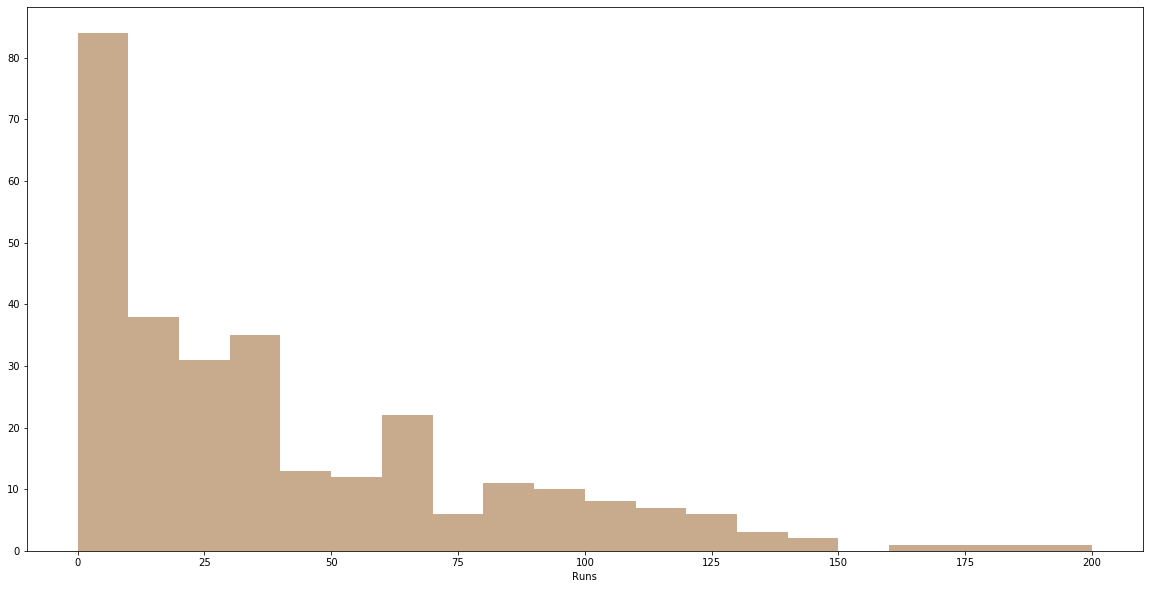

In [63]:
runs = tendulkar_df["Runs"]
sns.distplot(runs ,kde=False,bins=20)
plt.show()

In [61]:
tendulkar_df[tendulkar_df["Runs"] == "-"]

,Unnamed: 0,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
